# Drones!

## Section 3

### Graph Function $f_x$

$f_x(x) = \alpha^2xe^{\frac{-1}{2}\alpha^2x^2}$, only when $x > 0$

Additionally, we know that $\alpha = \frac{1}{\tau}$ and $\tau = 57$ inches.

In [2]:
tau = 57
alpha = 1/tau
print(f"In decimal form, alpha is equal to {alpha}")

In decimal form, alpha is equal to 0.017543859649122806


That is all we need in order to graph $f_x$ and $F_x$

![PDF of x](fx_graph1.PNG)

### Graph Function $F_x$

![bigfofx](./Fx_graph2.PNG)

This looks similar to the graph of $f_x$, and goes on for quite a while!

### Graph Three Circles

These were solved by graphing, setting $F_x = 0.5, 0.7, 0.9$ respectively. 

$$
P[X <= 67.112] = 0.5 \\ 
P[X <= 88.45] = 0.7 \\ 
P[X <= 122.32] = 0.9 \\ 
$$

From top to bottom: 

![circle_fun](assets/circle1.png)

![circle_fun](assets/circle2.png)

![circle_fun](assets/circle3.png)

## Section 4.2

### Random Number Generator - $u_{51}, u_{52}, u_{53}$

In [3]:
import numpy as np
import sys
import pprint as pprint
from numpy.random import normal
from matplotlib import pyplot
pyplot.style.use('seaborn')
# Parameters
mean = (1/alpha)*(np.sqrt(np.pi/2))
stdev = np.sqrt((4-np.pi)/(2*pow(alpha,2)))

# Increase rec limit
sys.setrecursionlimit(10000)
# Define params
a = 24693
c = 3967
K = pow(2, 18)
n = 1000

# Write recursive function


def rng(x):
    # Check if this is the seed
    if (x == 0):
        return 1000

    else:
        return (a * rng(x-1) + c) % K

Therefore, I used Python to compute: 

$$
u_{51} = 0.19949722290039062 \\
u_{52} = 0.2000579833984375 \\
u_{53} = 0.046916961669921875
$$ 

### Estimates of $m_n$

<AxesSubplot:>

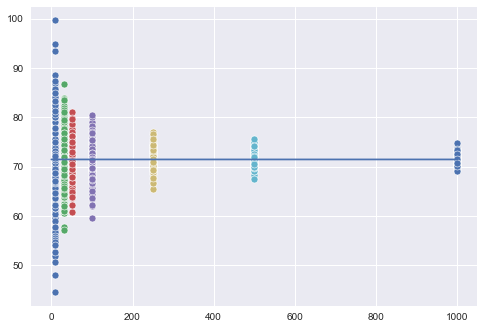

In [4]:
runs = [10, 30, 50,100, 250, 500, 1000]
import seaborn as sns 

def calc_means(samp_sizes, estimates):
    # 10, 30, . .. 1000 
    # Initialize an empty dictionary which maps sample sizes to arrays of sample means
    sample_means = {new_list: [] for new_list in samp_sizes}
    for ss in samp_sizes:
        # 1, 2, 3 . . . 110 
        for estimate in range(estimates): 
            sample = np.random.normal(loc = mean, scale = stdev, size = (ss))
            sample_means[ss].append(round(sample.mean(), 4))
    return sample_means

# Holds our dict containing sample means 
data = calc_means(runs, 110)
# Plot the data
for ss, s_mu in data.items(): 
    sns.scatterplot(x=ss, y=s_mu)
# Plot a line ux  
x2 = np.linspace(0, 1000, 10000)
y2 = [mean] * len(x2) 
sns.lineplot(x=x2, y=y2)

### More graphs showing Variance 

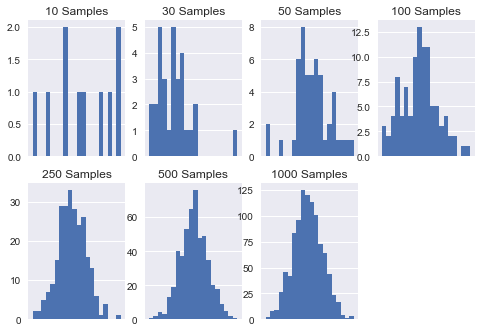

In [5]:
for run in range(len(runs)):
	sample = normal(mean, stdev, runs[run])
	pyplot.subplot(2, 4, run+1)
	pyplot.hist(sample, bins=20)
	pyplot.title('%d Samples' % runs[run])
	pyplot.xticks([])
pyplot.show()

### Interpretation of Estimates of $m_n$

According to the weak law of large numbers, as more samples are generated, the sample mean $M_n$ will eventually converge to the population mean $u_x$. In this case, the graph shown a few cells above shows that the sample mean dots gradually draw closer and closer to the line of $u_x$, showing that they are **converging** to that value. Therefore, the graph a few cells above demonstrates the **weak law of large numbers**. 

![Weak law of large numbers](https://wikimedia.org/api/rest_v1/media/math/render/svg/e3848a0ff097c73716a0bfc4df59c18691b2a323)

### Recommend $n*$

Now, we know that $u_x \approx 71.4389$, and we're looking for some amount of trials, $n*$, such that the sample mean, $M_{n*}$ will give us

$$
P[    | M_{n*} - 71.4389 | < 10 ] = 1
$$

Additionally, the CDF can be modeled by the following function

In [6]:
from sympy import * 
x = symbols('x')
cdf = 1-exp(Rational(-1, 2)*alpha**2*x**2)
cdf

1 - exp(-0.00015389350569406*x**2)

In [15]:
def meanfunc(num):
    sumn = 0
    for t in num:
        sumn = sumn + t

    avg = sumn / len(num)
    return avg
def find_val():
    samp_sizes = range(10, 300)
    estimates = 100
    # 10, 30, . .. 1000 
    # Initialize an empty dictionary which maps sample sizes to arrays of sample means
    sample_means = {new_list: [] for new_list in samp_sizes}
    for ss in samp_sizes:
        # 1, 2, 3 . . . 110 
        for estimate in range(estimates): 
            sample = np.random.normal(loc = mean, scale = stdev, size = (ss))
            sample_means[ss].append(round(sample.mean(), 4))
    count = 0
    for sample_size, samples in sample_means.items(): 
        results = []
        for s_mu in samples:
            if s_mu < 81.489 and s_mu > 61.4389: 
                results.append(s_mu)
                if (count == 110):
                    print(f"The sample size is {sample_size}")
                    return
                else: 
                    count+=1 
            else: 
                break
find_val()

The sample size is 32


When we have 32 trials, the sample mean is within the desired range. Considering that the central limit theorem is traditionally used when we have at least 30 trials, this is reasonable. 

**The recommended $n*$ is 32**

### Estimation for $p$

## Section 5.2